# Dataset Card Analysis

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import tqdm
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [7]:
dataset_card = pd.read_parquet('../Data/Dataset_Info/datasetcard_info.parquet')
dataset_card

,dataset_name,author,dataset_creation_time,downloads,task,domain,dataset_card,total_word_cnt,follow_template
0,super_glue,huggingface,Tue Jan 25 16:34:18 2022 +0100,1403269.0,"text-classification,token-classification,quest...",nlp,---\nannotations_creators:\n- expert-generated...,517.0,1.0
1,glue,huggingface,Tue Jan 25 16:34:03 2022 +0100,1140355.0,text-classification,nlp,---\nannotations_creators:\n- other\nlanguage_...,1388.0,1.0
2,argilla/news-summary,argilla,Wed Dec 7 05:39:38 2022 +0000,1093305.0,summarization,nlp,---\nlanguage:\n- en\nlicense:\n- cc-by-nc-4.0...,123.0,0.0
3,openwebtext,huggingface,Tue Jan 25 16:34:33 2022 +0100,755450.0,"text-generation,fill-mask",nlp,---\nannotations_creators:\n- no-annotation\nl...,211.0,1.0
4,bigscience/P3,bigscience,Thu Oct 14 03:22:22 2021 +0000,619941.0,other,None,---\nannotations_creators:\n- crowdsourced\n- ...,981.0,0.0
...,...,...,...,...,...,...,...,...,...
7428,autoevaluate/autoeval-staging-eval-cnn_dailyma...,autoevaluate,Sun Sep 4 02:39:17 2022 +0000,0.0,None,None,---\ntype: predictions\ntags:\n- autotrain\n- ...,51.0,0.0
7429,api19750904/News_bcn_sentiment,api19750904,Fri Oct 21 15:23:04 2022 +0000,0.0,None,None,News on Barcelona en spanish media outlets,7.0,0.0
7430,irds/mr-tydi_ko_test,irds,Thu Jan 5 03:36:28 2023 +0000,0.0,text-retrieval,None,---\npretty_name: '`mr-tydi/ko/test`'\nviewer:...,72.0,0.0
7431,irds/mmarco_v2_vi_train,irds,Thu Jan 5 03:29:58 2023 +0000,0.0,text-retrieval,None,---\npretty_name: '`mmarco/v2/vi/train`'\nview...,74.0,0.0


group_sizes [100, 500, 1500, 2500, 5000, None, 0] means, stderrs [0.86, 0.758, 0.6593333333333333, 0.5504, 0.3956, 0.2918068074801561, 0.07932924862947437] [0.0348735088019777, 0.019173085678337164, 0.012240989358418209, 0.009951057502505311, 0.006915901527551398, 0.005273157377025023, 0.004853868392136298]


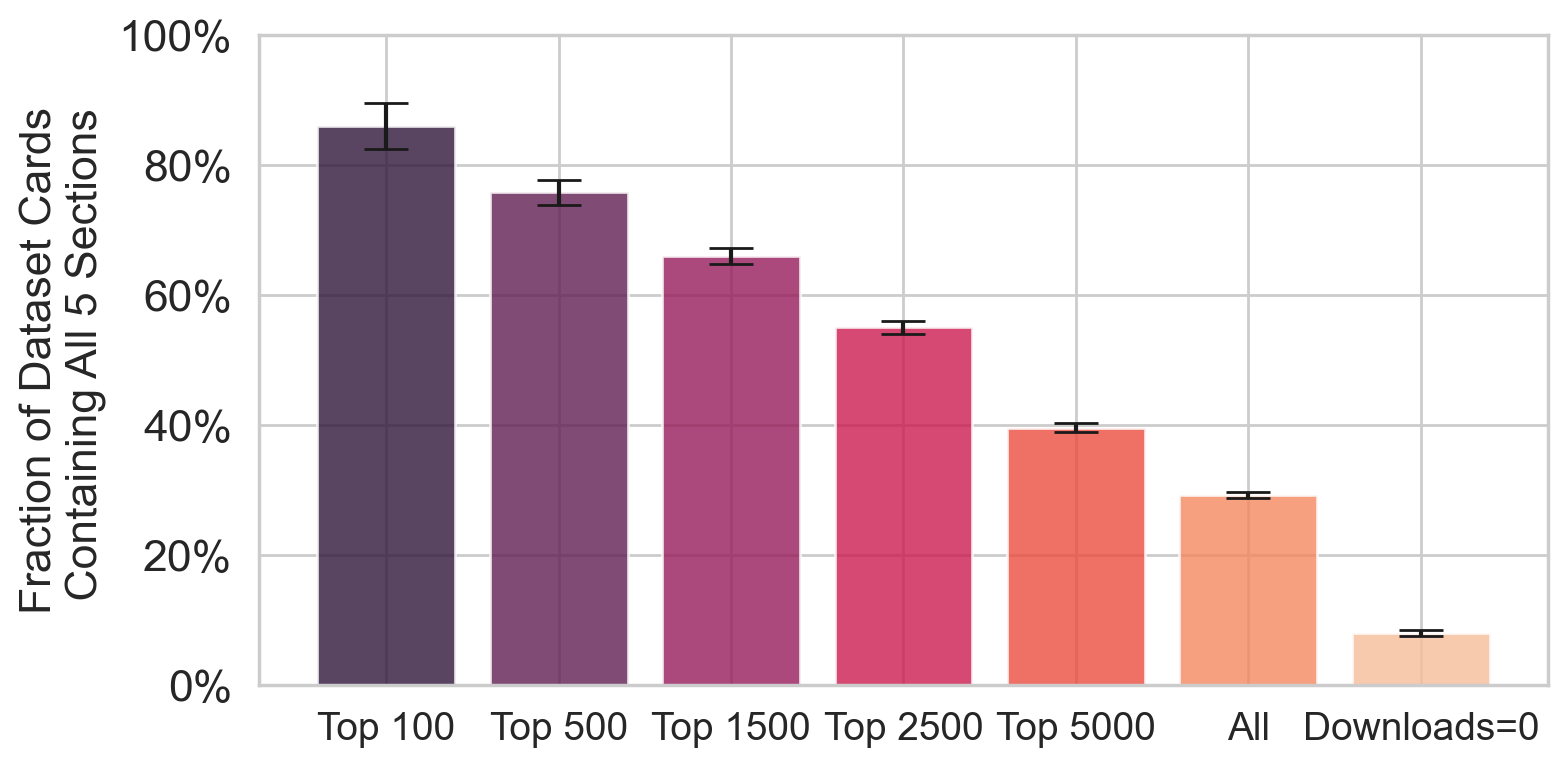

In [8]:
group_sizes = [100, 500, 1500, 2500, 5000]
labels = [f'Top {size}' for size in group_sizes] + ['All'] + ['Downloads=0']
group_sizes.append(None) # For calculating all
group_sizes.append(0)


def calculate_mean_sem(dataframe, group_sizes):
    means = [dataframe.head(size)['follow_template'].mean() for size in group_sizes[:-1]]
    stderrs = [dataframe.head(size)['follow_template'].sem() for size in group_sizes[:-1]]
    means.append(dataframe[dataframe['downloads']==0]['follow_template'].mean())
    stderrs.append(dataframe[dataframe['downloads']==0]['follow_template'].sem())
    return means, stderrs

means, stderrs = calculate_mean_sem(dataset_card, group_sizes)

def plot_word_count_bar_chart(means, stderrs, labels):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))
    
    bar_colors = sns.color_palette("rocket", n_colors=len(labels))
    plt.bar(labels, means, yerr=stderrs, capsize=8, color=bar_colors, alpha=0.8)
    
    plt.ylabel('Fraction of Dataset Cards\n Containing All 5 Sections', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=16)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

    # set y axis range to 0-1
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()
    return

means, stderrs = calculate_mean_sem(dataset_card, group_sizes)
print('group_sizes', group_sizes, 'means, stderrs', means, stderrs)
plot_word_count_bar_chart(means, stderrs, labels)

group_sizes [100, 200, 500, 1500, 2500, 5000, None] means, stderrs [617.5, 579.86, 493.504, 433.18, 364.722, 295.332, 232.95479617920086] [102.17462226180939, 57.12100531539344, 26.195191851182166, 12.449773129150246, 8.651960488497263, 5.488969195738517, 6.354580027835507]


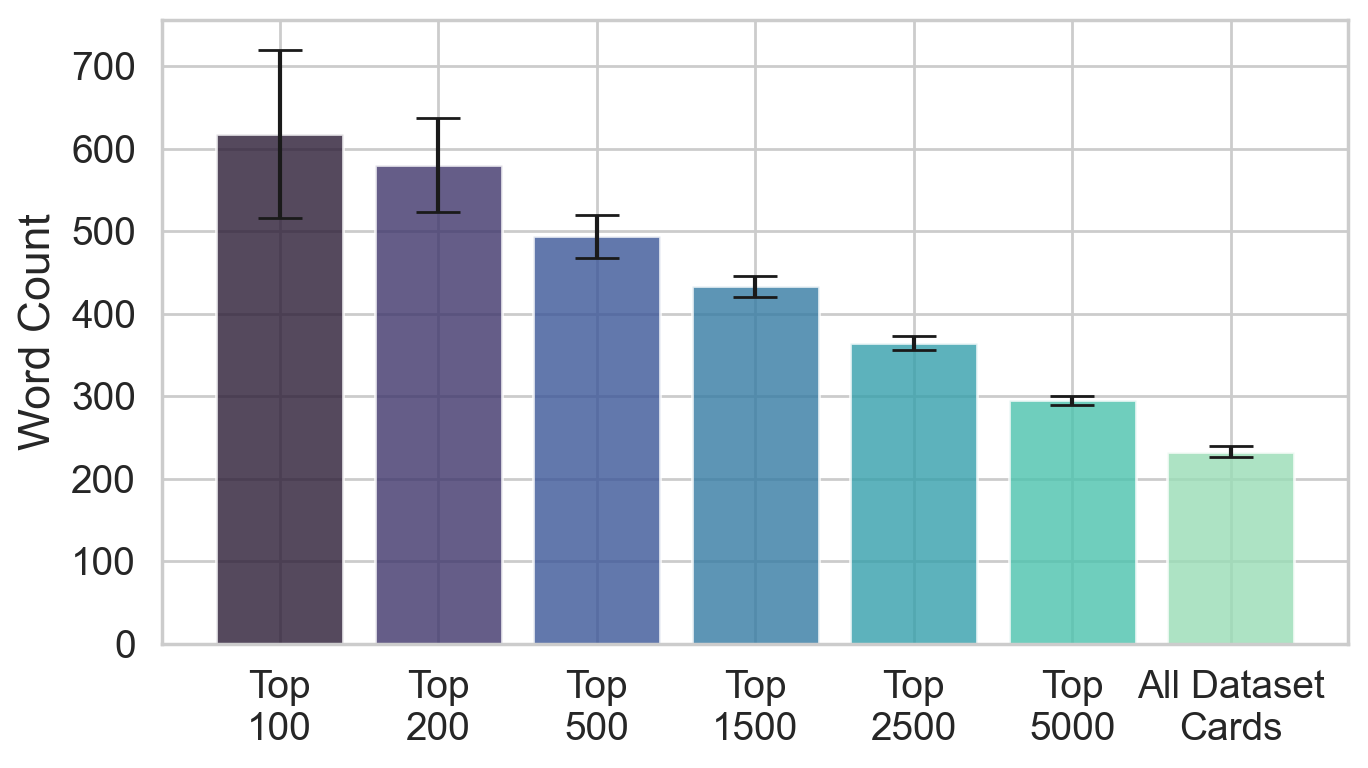

In [9]:
def calculate_mean_sem(dataframe, group_sizes):
    means = [dataframe.head(size)['total_word_cnt'].mean() for size in group_sizes]
    stderrs = [dataframe.head(size)['total_word_cnt'].sem() for size in group_sizes]
    return means, stderrs

def plot_word_count_bar_chart(means, stderrs, labels):
    sns.set(style="whitegrid")
    plt.figure(figsize=(7, 4))
    
    bar_colors = sns.color_palette("mako", n_colors=len(labels))
    plt.bar(labels, means, yerr=stderrs, capsize=8, color=bar_colors, alpha=0.8)
    
    plt.ylabel('Word Count', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    
    plt.show()
    return

group_sizes = [100, 200, 500, 1500, 2500, 5000]
labels = [f'Top\n{size}' for size in group_sizes] + ['All Dataset\nCards']
group_sizes.append(None) # For calculating all

means, stderrs = calculate_mean_sem(dataset_card, group_sizes)
print('group_sizes', group_sizes, 'means, stderrs', means, stderrs)
plot_word_count_bar_chart(means, stderrs, labels)


## Dataset Card Section Analysis

In [10]:
import pandas as pd
import tqdm

In [11]:
section_list = [
    'dataset description',
    'dataset structure',
    'dataset creation',
    'considerations for using the data',
    'additional information',
    'other'
]

In [12]:
datasetcard_section = pd.read_parquet('../Data/Dataset_Info/datasetcard_sections_info.parquet')
datasetcard = pd.read_parquet('../Data/Dataset_Info/datasetcard_info.parquet')
# set the display row number to be 5
pd.set_option('display.max_rows', 5)
datasetcard_section

dataset description  \
                                                           has_section   
super_glue                                                           1   
glue                                                                 1   
...                                                                ...   
irds/mmarco_v2_vi_train                                              0   
autoevaluate/autoeval-staging-eval-project-976d...                   0   

                                                                              \
                                                   section_length_proportion   
super_glue                                                          0.268182   
glue                                                                0.712919   
...                                                                      ...   
irds/mmarco_v2_vi_train                                             0.000000   
autoevaluate/autoeval-staging-eval-project-976d...                  0.000000   

                                                                                                       \
                                                                                     subsection_title   
super_glue                                                                            Dataset Summary   
glue                                                Supported Tasks and Leaderboards;Languages;Dat...   
...                                                                                               ...   
irds/mmarco_v2_vi_train                                                                          None   
autoevaluate/autoeval-staging-eval-project-976d...                                               None   

                                                                                                       \
                                                                                      section_content   
super_glue                                          Dataset Description\nHomepage: https://github....   
glue                                                Dataset Description\nHomepage: https://nyu-mll...   
...                                                                                               ...   
irds/mmarco_v2_vi_train                                                                          None   
autoevaluate/autoeval-staging-eval-project-976d...                                               None   

                                                                       \
                                                   word_cnt not_empty   
super_glue                                              118         1   
glue                                                    894         1   
...                                                     ...       ...   
irds/mmarco_v2_vi_train                                   0         0   
autoevaluate/autoeval-staging-eval-project-976d...        0         0   

                                                   dataset structure  \
                                                         has_section   
super_glue                                                         1   
glue                                                               1   
...                                                              ...   
irds/mmarco_v2_vi_train                                            0   
autoevaluate/autoeval-staging-eval-project-976d...                 0   

                                                                              \
                                                   section_length_proportion   
super_glue                                                          0.704545   
glue                                                                0.275917   
...                                                                      ...   
irds/mmarco_v2_vi_train                                             0.000000   
au

In [22]:
datasetcard_section

Dataset Description
Homepage: https://nyu-mll.github.io/CoLA/
Repository: 
Paper: 
Point of Contact: 
Size of downloaded dataset files: 955.33 MB
Size of the generated dataset: 229.68 MB
Total amount of disk used: 1185.01 MB
Dataset Summary
GLUE, the General Language Understanding Evaluation benchmark () is a collection of resources for training, evaluating, and analyzing natural language understanding systems.
Supported Tasks and Leaderboards
The leaderboard for the GLUE benchmark can be found at this address. It comprises the following tasks:
#### axA manually-curated evaluation dataset for fine-grained analysis of system performance on a broad range of linguistic phenomena. This dataset evaluates sentence understanding through Natural Language Inference (NLI) problems. Use a model trained on MulitNLI to produce predictions for this dataset.
#### colaThe Corpus of Linguistic Acceptability consists of English acceptability judgments drawn from books and journal articles on linguistic 

In [13]:
coverage_pd = pd.DataFrame(columns=section_list, index = datasetcard_section['other'].index)
for i in section_list:
    coverage_pd[i] = datasetcard_section[i]['section_length_proportion']


In [14]:
dataset_description_avg = coverage_pd['dataset description'].mean()
dataset_structure_avg = coverage_pd['dataset structure'].mean()
dataset_creation_avg = coverage_pd['dataset creation'].mean()
considerations_for_using_the_data_avg = coverage_pd['considerations for using the data'].mean()
additional_information_avg = coverage_pd['additional information'].mean()
other_avg = coverage_pd['other'].mean()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

data = pd.DataFrame(
    {'section': section_list,
     'coverage': [coverage_pd[i].head(100).mean() for i in section_list]
    })

labels = ['Dataset<br>Description', 'Dataset<br>Structure', 'Dataset<br>Creation', 'Considerations<br>for Using the Data', 'Additional<br>Information', 'Other']

fig = px.pie(data, values='coverage', names='section', color_discrete_sequence=px.colors.sequential.Redor)
# change value to be displayed inside the pie chart and add labels, value should be in percentage format
values = data['coverage'].values*100
values = [f'{value:.1f}%' for value in values]

fig.update_traces(textposition='inside', textinfo='text+label', labels=labels, text=values)


# add annotation "Considerations for Using the Data"
fig.add_annotation(x=0.69, y=0.2, ax=-15, ay=-60,
            text="Considerations for<br>Using the Data: {:.1f}%".format(data.loc[data['section'] == 'considerations for using the data', 'coverage'].values[0]*100),
            arrowhead=1, showarrow=True,
            borderpad=3,
            # set arrow color to white
            arrowcolor="white",
            # set text color to black
            font=dict(
                color="black",
                size=16
                ),
            bgcolor="#ffffff",
            opacity=0.8)

fig.update_layout(title_text="Average Coverage of Dataset Card Sections")
# customize the text color of each section
fig.update_traces(textfont_color=['black', 'black', 'black', 'white', 'black', 'white'])
# change the boldness of the text
fig.update_traces(textfont_size=[16, 16, 14, 14, 14, 16])

fig.update_layout(showlegend=False)
fig.update_layout(title_text=None)

# update figure size
fig.update_layout(
    autosize=False,
    width=400,
    height=300,
    margin=dict(l=0, r=0, b=0, t=0, pad=0)
)
fig.show()


# import plotly.io as pio

# # Save the figure with a high resolution (dpi=300)
# pio.write_image(fig, 'Figure3_pie_chart.jpeg', width=400, height=300, scale=10)

In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from datetime import timedelta

datasetcard_section['creation_time'] = datasetcard['dataset_creation_time']
datasetcard_section['downloads'] = datasetcard['downloads']

section_list = [
    'Dataset Description',
    'Dataset Structure',
    'Dataset Creation',
    'Considerations for Using the Data',
    'Additional Information',
    'Other'
]

def downloads_filled_out_percentage(df, section_list, start_downloads, end_downloads):
    downloads_range = np.linspace(50, len(df), 100)
    # print(downloads_range)

    
    filled_out_percentage = {section: [] for section in section_list}
    
    for downloads in downloads_range:
        # filtered_df = df[df['index'] <= downloads]
        for section in section_list:
            filled_out_percentage[section].append(df[section.lower()].head(int(downloads))['section_length_proportion'].mean())
    
    return filled_out_percentage, downloads_range

filled_out_percentage, downloads_range = downloads_filled_out_percentage(datasetcard_section, section_list, 100, 10000)

fig = go.Figure()

for section in section_list:
    fig.add_trace(go.Scatter(x=downloads_range, y=filled_out_percentage[section], mode='lines', name=section))

fig.update_layout(
    title="Section Percentage Over Downloads",
    xaxis_title="Downloads Ranking",
    yaxis_title="Proportion of Section Length<br>to Dataset Card Length",
    legend_title="Sections",
    xaxis=dict(rangeslider=dict(visible=True)),
)

# update x ticks
fig.update_xaxes(
    ticktext=["Top 1000", "Top 3000", "Top 5000","Top 7000"],
    tickvals=[1000, 3000, 5000, 7000],
)
# change text to black and bold
fig.update_layout(
    font=dict(
        color="black",
        size=14
    )
)
# change figure size
fig.update_layout(
    autosize=False,
    width=550,
    height=400,
    margin=dict(l=0, r=10, b=0, t=100, pad=0)
)
# no title
fig.update_layout(title_text=None)
# update y-axis label size
fig.update_layout(
    yaxis=dict(
        titlefont_size=15,
    )
)

# change legend position and text size and remove the legend title
fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        x=-0.01,
        font=dict(
            size=12
        ),
        title=None
    )
)
# change the legend to be horizontal
fig.update_layout(
    legend=dict(
        orientation="h",
    )
)
# set y-axis to range from 0 to 0.4
fig.update_yaxes(range=[0, 0.4])

# update the y-axis ticks to be percentage format, leave 2 decimal places
fig.update_yaxes(tickformat=".0%")


fig.show()
# import plotly.io as pio

# # Save the figure with a high resolution (dpi=300)
# pio.write_image(fig, 'Figure3_change_over_downloads.jpeg', width=550, height=400, scale=10)

## Subsection Analysis

In [17]:
section_type_dict = {
    'dataset description': ['dataset summary', 'supported tasks and leaderboards', 'languages'],
    'dataset structure': ['data instances', 'data fields', 'data splits'],
    'dataset creation': [
                         'curation rationale', 'source data', 
                         'annotations', 
                         'personal and sensitive information'],
    'considerations for using the data': ['social impact of dataset', 'discussion of biases', 'other known limitations'],
    'additional information': ['dataset curators', 'licensing information', 'citation information', 'contributions'],
    'other': ['about', 'usage']
}

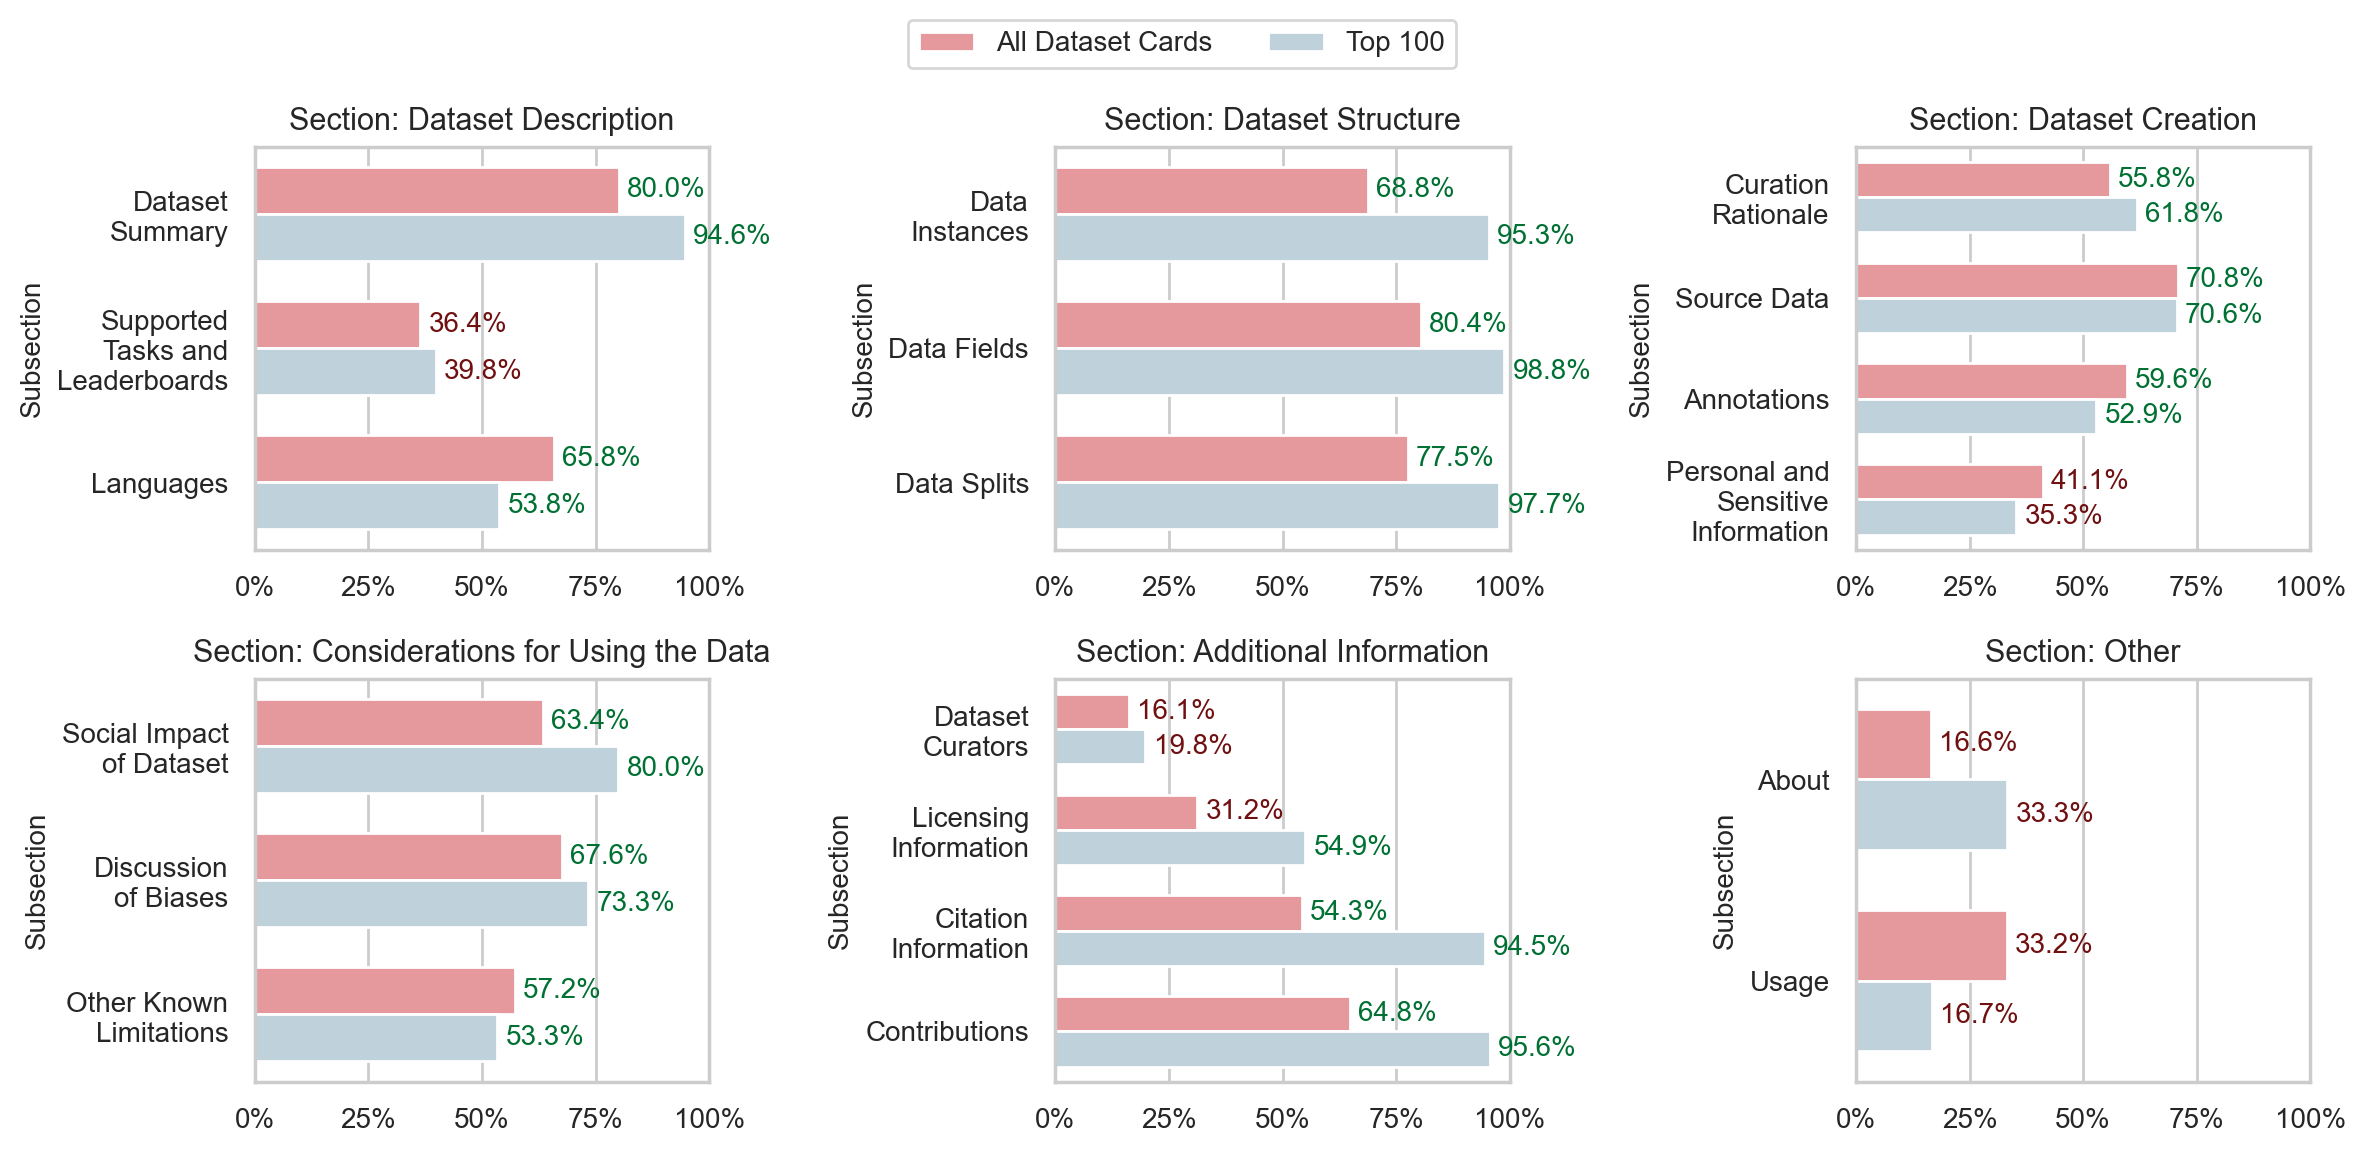

In [18]:
def gather_subsection_filled_out_data(df, label, section):
    section_filled_out_data = []

    theme_list = section_type_dict[section]


    for theme in theme_list:
        section_selected = df[section]
        section_selected['subsection_title']= section_selected['subsection_title'].apply(lambda x: x.lower() if x is not None else None).values.tolist()
        selected = section_selected[section_selected['has_section']==True]
        if theme == 'source data':
            subtheme_1 = 'initial data collection'
            subtheme_2 = 'who are the source language producers'
            contain_theme = selected[selected['subsection_title'].str.contains(theme) \
                                        | selected['subsection_title'].str.contains(subtheme_1)\
                                        | selected['subsection_title'].str.contains(subtheme_2)]
        elif theme == 'annotations':
            subtheme_1 = 'annotation process'
            subtheme_2 = 'who are the annotators'
            contain_theme = selected[selected['subsection_title'].str.contains(theme) \
                                        | selected['subsection_title'].str.contains(subtheme_1)\
                                        | selected['subsection_title'].str.contains(subtheme_2)]        
        else:
            contain_theme = selected[selected['subsection_title'].str.contains(theme)]
        section_filled_out_data.append({
            'label': label,
            'section': theme,
            'Filled-Out Rate':  len(contain_theme) / len(selected),
        })
    
    return section_filled_out_data


def gather_top_n_filled_out_data(df, group_sizes, labels, section):
    all_top_n_section_filled_out_data = []
    for size, label in zip(group_sizes, labels):
        ret = gather_subsection_filled_out_data(df.head(size), label, section)
        all_top_n_section_filled_out_data.extend(ret)
        
    return all_top_n_section_filled_out_data

group_sizes = [100, ] #[100, 200, 500, 1000, 2500, 5000]
labels = [f'Top {size}' for size in group_sizes] + ['All Dataset Cards']
group_sizes.append(None) # For calculating all
group_sizes = group_sizes[::-1]
labels = labels[::-1]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5.5))

for i, section in enumerate(section_type_dict):
    all_top_n_section_filled_out_data = gather_top_n_filled_out_data(datasetcard_section, group_sizes, labels, section)

    df_all_top_n_section_filled_out_data = pd.DataFrame(all_top_n_section_filled_out_data)
    # dictionary mapping old names to new names
    rename_dict = {
        'dataset summary': 'Dataset\nSummary',
        'supported tasks and leaderboards': 'Supported\nTasks and\nLeaderboards',
        'languages': "Languages",
        'data instances': "Data\nInstances", 
        'data fields': "Data Fields", 
        'data splits': "Data Splits",
        'curation rationale': "Curation\nRationale", 
        'source data': "Source Data", 
        'annotations': "Annotations", 
        'personal and sensitive information': "Personal and\nSensitive\nInformation",
        'social impact of dataset': "Social Impact\nof Dataset",
        'discussion of biases': "Discussion\nof Biases",
        'other known limitations': "Other Known\nLimitations",
        'dataset curators': "Dataset\nCurators", 
        'licensing information': "Licensing\nInformation", 
        'citation information': "Citation\nInformation", 
        'contributions': "Contributions",
        'about': "About", 
        'usage': "Usage"
        }
    section_map = {
        "dataset description": "Dataset Description",
        "dataset structure": "Dataset Structure",
        "dataset creation": "Dataset Creation",
        "considerations for using the data": "Considerations for Using the Data",
        "additional information": "Additional Information",
        "other": "Other"
    }
    df_all_top_n_section_filled_out_data['section'] = df_all_top_n_section_filled_out_data['section'].replace(rename_dict).values.tolist()

    ax = sns.barplot(data=df_all_top_n_section_filled_out_data, y='section', x='Filled-Out Rate', hue='label', orient='h', 
    palette=['#f18d91', '#bad3df'], width=0.7, dodge=0.4, ax=axes[i//3, i%3],
    )

    ax.set_xlim(right=1.00)
    ax.set_ylabel('Subsection')
    ax.set_xlabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(10)

    # remove the legend
    ax.legend_.remove()

    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    # set the title of each subplot
    ax.set_title("Section: " + section_map[section], fontsize=11)

    for p in ax.patches:
        color = "#701011" if p.get_width() < 0.5 else '#007033'
        ax.annotate('{:.1%}'.format( p.get_width() ), (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=10, color=color, xytext=(3, 0),
                    textcoords='offset points')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.06), ncol=3, fontsize=10)

plt.tight_layout()
# plt.savefig('Figure_subsection.jpeg', dpi=300, bbox_inches='tight')
